### Final Project - Data Hawks
---

#### Team Members:
> #### Sai Shishir Ailneni (U38559388)
> #### Sai Koushik Thatipamula (U18895638)
> #### Deepshikha Sherpally (U57605062)
> #### Akshitha Katta (U38519838)
> #### Rohith Sahini (U18270323)
---

### Notebook : Model Fitting
---

This Jupyter Notebook serves as a comprehensive guide to building and fine-tuning machine learning models for various classifiers. In this notebook, we will explore the process of model selection, training, and hyperparameter optimization for four different classifiers: Random Forest, XGBoost, Decision Tree, and Support Vector Machine (SVM).

1. **Model Selection**: We introduce the five machine learning classifiers (Random Forest, XGBoost, MLP Classifier, Decision Tree, and SVM) and discuss their strengths and weaknesses in the context of the problem we are solving.

2. **Model Training and Evaluation**: For each classifier, we fit the model to the preprocessed data and evaluate its performance using appropriate metrics. This section includes model training and initial performance assessment.

3. **Hyperparameter Tuning**: To optimize the models, we conduct hyperparameter tuning using techniques like RandomizedSearchCV and GridSearchCV. This step aims to find the best set of hyperparameters.

4. **Results and Comparative Analysis**: We compare the performance of each tuned model, highlighting their strengths and weaknesses. This section provides insights into which classifier performs best for the given problem.

---

#### Problem Statement

- The objective of this project is to develop a predictive model that can accurately determine the likelihood of early hospital readmission for patients based on their medical and demographic data. In this context, "early readmission" is defined as a patient being readmitted to the hospital within 30 days of their previous discharge.

---

#### Metric

**False Positives (FP):**

Definition: *Patients predicted to be at risk of early readmission ("<30 days"), but they were not readmitted within 30 days.*

Significance: *False positives represent cases where the model incorrectly identifies patients as at risk of early readmission when, in reality, they do not experience early readmission. This can lead to unnecessary interventions or resources allocated to these patients.*

**False Negatives (FN):**

Definition: *Patients who are not predicted to be at risk of early readmission ("<30 days"), but they are actually readmitted within 30 days.*

Significance: *False negatives represent cases where the model fails to identify patients who are at risk of early readmission. Missing these cases can have clinical implications, as these patients may benefit from closer monitoring or intervention to prevent early readmission.*

- The trade-off between FP and FN is a critical aspect of model evaluation in healthcare scenarios. In this specific problem, minimizing FNs (patients who are truly at risk but not identified) might be more crucial because failing to detect early readmission can have adverse consequences for patient care. Therefore, the model's performance should be evaluated based on its ability to minimize FN cases and increase recall.

---

#### Step-1: Importing the required Libraries

In [63]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np    
    
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler 
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from scipy.stats import uniform,expon

from sklearn.metrics import confusion_matrix,roc_curve, roc_auc_score,accuracy_score, recall_score, precision_score, f1_score,precision_recall_curve,ConfusionMatrixDisplay,classification_report

---

#### Step-2 : Loading the data

In [2]:
train_data = pd.read_csv('train_data.csv')

In [3]:
valid_data = pd.read_csv('valid_data.csv')

In [4]:
train_data['readmitted'].value_counts()

0    52157
1     5033
Name: readmitted, dtype: int64

---

#### Step-3: Splitting the data into features and target

In [5]:
features_train = train_data.drop(columns=['readmitted'])
target_train = train_data['readmitted']

In [6]:
features_test = valid_data.drop(columns=['readmitted'])
target_test = valid_data['readmitted']

---

#### Step-4: Resampling the data.

Advantages of Undersampling

1. **Improves Recall**: Random undersampling can help improve the recall of a classification model by reducing the class imbalance. By randomly undersampling the majority class, the model is exposed to more positive instances, making it more likely to correctly identify them.

2. **Focus on Positive Instances**: Undersampling gives the model an opportunity to focus on the positive instances and reduce the risk of missing them. This is essential in scenarios where false negatives (missed positive cases) have serious consequences.

3. **Balances the Class Distribution**: Random undersampling balances the class distribution, making it easier for the model to learn the features and patterns associated with the positive class. This can lead to more accurate predictions for the minority class.

4. **Reduces Computational Complexity**: In extremely imbalanced datasets, training a model can be computationally expensive. Undersampling the majority class reduces the size of the dataset and can lead to faster model training.

In [7]:
rus = RandomUnderSampler(random_state=42)
X_ros, y_ros = rus.fit_resample(features_train, target_train)

---

#### Step-5: Model Fitting

##### 5.1 - Random Forest

In [8]:
rf = RandomForestClassifier()

rf.fit(X_ros, y_ros)
preds = rf.predict(features_test)

print('Recall: ', recall_score(target_test,preds))

Recall:  0.5639396346306592


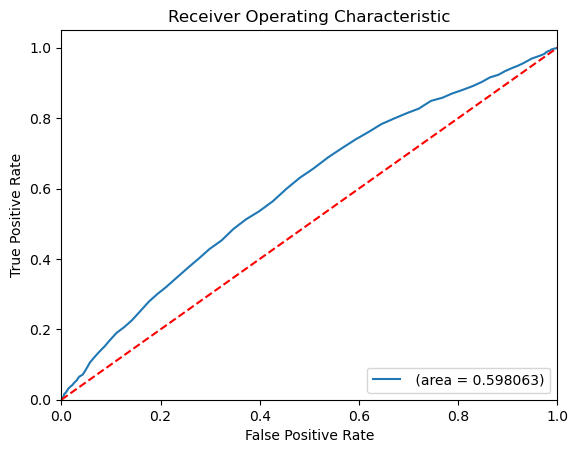

In [9]:
# ROC Curve

fpr, tpr, thresholds = roc_curve(target_test, rf.predict_proba(features_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label=' (area = %f)' % roc_auc_score(target_test, rf.predict_proba(features_test)[:,1]))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [54]:
rf_classifier = RandomForestClassifier()

param_dist = {
    'n_estimators': [10,50,100],  # Number of trees in the forest
    'max_depth': [None,10,50,75],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(
    rf_classifier, param_distributions=param_dist, n_iter=100, cv=5, scoring='recall', n_jobs=-1)

# Fit the model on your data (X_train and y_train are your training data)
random_search.fit(X_ros, y_ros)

# Get the best hyperparameters
best_params = random_search.best_params_

# Get the best estimator (trained model)
best_rf_model = random_search.best_estimator_

In [27]:
best_params

{'n_estimators': 50,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_depth': 10,
 'bootstrap': False}

In [31]:
rf_classifier = RandomForestClassifier()

# Define a grid of hyperparameters around the provided values
param_grid = {
    'n_estimators': [30, 50, 70],  # Vary the number of trees
    'max_depth': [8, 10, 12],     # Vary the maximum depth of the trees
    'min_samples_split': [8, 10, 12],  # Vary the minimum samples required to split a node
    'min_samples_leaf': [1, 2, 3],    # Vary the minimum samples required at a leaf node
    'bootstrap': [False]  # Keep it fixed since it was False in the provided parameters
}

# Create a GridSearchCV object
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='recall', n_jobs=-1)

grid_search.fit(X_ros, y_ros)

best_params_grid = grid_search.best_params_

best_rf_model = grid_search.best_estimator_

In [28]:
preds = best_rf_model.predict(features_test)

print('Recall: ', recall_score(target_test,preds))

Recall:  0.5917394757744241


In [32]:
best_params_grid

{'bootstrap': False,
 'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 30}

In [33]:
preds = best_rf_model.predict(features_test)

print('Recall: ', recall_score(target_test,preds))

Recall:  0.5933280381254964


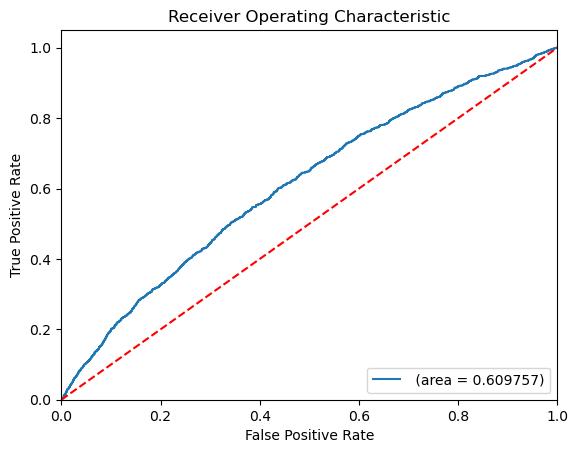

In [61]:
# ROC Curve

fpr, tpr, thresholds = roc_curve(target_test, best_rf_model.predict_proba(features_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label=' (area = %f)' % roc_auc_score(target_test, best_rf_model.predict_proba(features_test)[:,1]))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

---

##### 5.2 SVC

In [56]:
svc = SVC(probability = True)

svc.fit(X_ros, y_ros)

preds = svc.predict(features_test)

print('Recall: ', recall_score(target_test,preds))

Recall:  0.5448768864177919


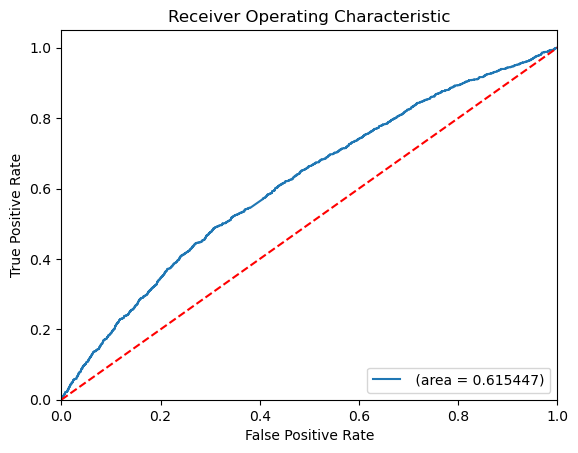

In [57]:
# ROC Curve

fpr, tpr, thresholds = roc_curve(target_test, svc.predict_proba(features_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label=' (area = %f)' % roc_auc_score(target_test, svc.predict_proba(features_test)[:,1]))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

---

##### 5.3 XG Boost

In [14]:
xgb=XGBClassifier()

xgb.fit(X_ros, y_ros)

preds = xgb.predict(features_test)

print('Accuracy: ', recall_score(target_test,preds))

Accuracy:  0.5702938840349484


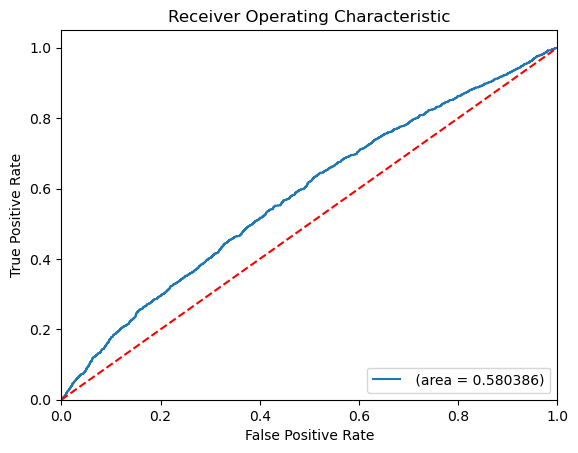

In [15]:
# ROC Curve

fpr, tpr, thresholds = roc_curve(target_test, xgb.predict_proba(features_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label=' (area = %f)' % roc_auc_score(target_test, xgb.predict_proba(features_test)[:,1]))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [39]:
# Create an XGBoost classifier
xgb_classifier = XGBClassifier()

# Define hyperparameter ranges to search
param_dist = {
    'n_estimators': [10,50,100,150],  # Number of boosting rounds
    'max_depth': [3,6,11],  # Maximum depth of a tree
    'learning_rate': [0.001, 0.01, 0.1],  # Step size shrinkage to prevent overfitting
    'subsample': [0.6, 0.8, 1.0],  # Fraction of samples used for building trees
    'colsample_bytree': [0.6, 0.8, 1.0],  # Fraction of features used for building trees
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(
    xgb_classifier, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model on your data (X_train and y_train are your training data)
random_search.fit(X_ros, y_ros)

# Get the best hyperparameters
best_xg_params = random_search.best_params_

# Get the best estimator (trained model)
best_xgb_model = random_search.best_estimator_

In [41]:
preds = best_xgb_model.predict(features_test)

print('Recall: ', recall_score(target_test,preds))

Recall:  0.5972994440031771


In [40]:
best_xg_params

{'subsample': 0.6,
 'n_estimators': 50,
 'max_depth': 6,
 'learning_rate': 0.001,
 'colsample_bytree': 0.8}

In [44]:
xgb_classifier = XGBClassifier()

# Define a grid of hyperparameters around the provided values
param_dist = {
    'n_estimators': [40,50,60],  # Number of boosting rounds
    'max_depth': [5,6,7],  # Maximum depth of a tree
    'learning_rate': [0.001,0.0015, 0.002],  # Step size shrinkage to prevent overfitting
    'subsample': [0.4,0.5,0.6],  # Fraction of samples used for building trees
    'colsample_bytree': [0.7, 0.8,0.9],  # Fraction of features used for building trees
}

# Create a GridSearchCV object
grid_search = GridSearchCV(xgb_classifier, param_dist, cv=5, scoring='recall', n_jobs=-1)

grid_search.fit(X_ros, y_ros)

best_params_grid = grid_search.best_params_

best_xgb_model = grid_search.best_estimator_

In [45]:
best_params_grid

{'colsample_bytree': 0.7,
 'learning_rate': 0.001,
 'max_depth': 7,
 'n_estimators': 40,
 'subsample': 0.4}

In [46]:
preds = best_xgb_model.predict(features_test)

print('Recall: ', recall_score(target_test,preds))

Recall:  0.5861795075456712


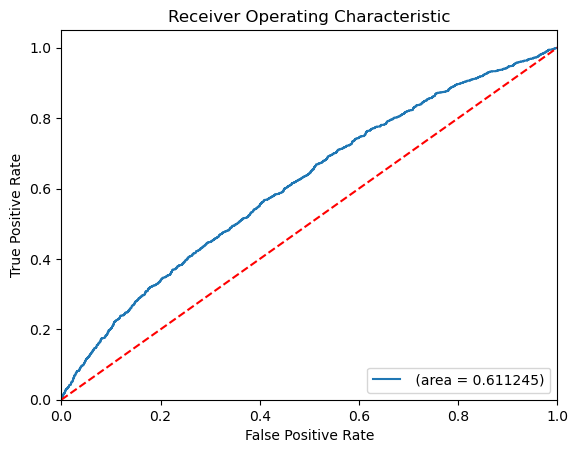

In [65]:
# ROC Curve

fpr, tpr, thresholds = roc_curve(target_test, best_xgb_model.predict_proba(features_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label=' (area = %f)' % roc_auc_score(target_test, best_xgb_model.predict_proba(features_test)[:,1]))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

---

##### 5.4 Decision Tree's

In [59]:
DT = DecisionTreeClassifier()

DT.fit(X_ros, y_ros)

preds = DT.predict(features_test)

print('recall: ', recall_score(target_test,preds))

recall:  0.5321683876092137


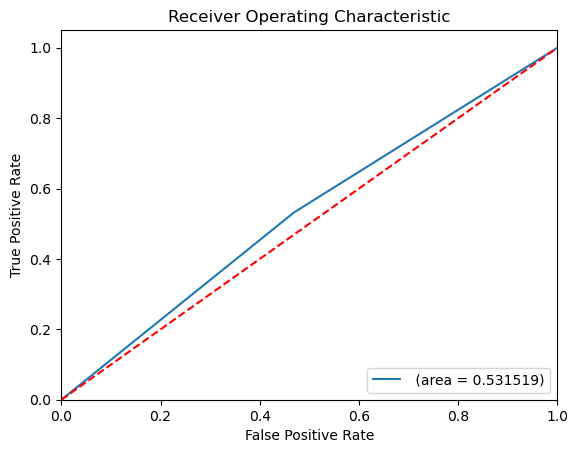

In [60]:
# ROC Curve

fpr, tpr, thresholds = roc_curve(target_test, DT.predict_proba(features_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label=' (area = %f)' % roc_auc_score(target_test, DT.predict_proba(features_test)[:,1]))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [47]:
# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Define hyperparameter ranges to search
param_dist = {
    'criterion': ['gini', 'entropy'],  # Splitting criterion
    'splitter': ['best', 'random'],     # Strategy for choosing splits
    'max_depth': [5,10,15],      # Maximum depth of the tree
    'min_samples_split': [3,6,11],  # Minimum samples required to split a node
    'min_samples_leaf': [2,6,11]   # Minimum samples required at a leaf node
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(
    dt_classifier, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model on your data (X_train and y_train are your training data)
random_search.fit(X_ros, y_ros)

# Get the best hyperparameters
best_dt_params = random_search.best_params_

# Get the best estimator (trained model)
best_dt_model = random_search.best_estimator_

In [48]:
best_dt_params

{'splitter': 'random',
 'min_samples_split': 6,
 'min_samples_leaf': 11,
 'max_depth': 5,
 'criterion': 'entropy'}

In [49]:
preds = best_dt_model.predict(features_test)

print('Recall: ', recall_score(target_test,preds))

Recall:  0.4511517077045274


---

### Conclusion

**SVM (Support Vector Machine):**

**AUC = 0.615**: The AUC score for SVM indicates that the model demonstrates moderate discrimination ability in distinguishing between early readmissions and other categories. An AUC of 0.615 suggests that the model's performance is better than random guessing but has room for improvement.

**Recall = 0.545**: The recall score of 0.545 highlights that the SVM model correctly identifies 54.5% of the patients who were actually at risk of early readmission. This means that, although SVM shows moderate overall performance, it still misses a substantial portion of at-risk patients. This could potentially lead to some patients not receiving necessary follow-up care.

**Random Forest:**

**AUC = 0.610**: The AUC score for Random Forest is similar to SVM, indicating comparable discrimination ability. However, it's important to note that AUC alone might not tell the whole story.

**Recall = 0.5933**: The Random Forest model performs slightly better in recall compared to SVM. With a recall of 0.5933, it correctly identifies 59.33% of at-risk patients, which is an improvement. This suggests that Random Forest might be more effective in identifying patients who need early intervention.

**XGBoost:**

**AUC = 0.611**: XGBoost also demonstrates a similar AUC to the other models, indicating moderate discrimination ability.

**Recall = 0.597**: The recall score of 0.597 for XGBoost is consistent with Random Forest, indicating that it correctly identifies 59.7% of at-risk patients. This suggests that XGBoost is effective in capturing patients at risk of early readmission.

**Decision Tree:**

**AUC = 0.531**: The AUC score for the Decision Tree is noticeably lower than the other models, indicating weaker discrimination ability. This suggests that the Decision Tree model struggles to distinguish between different readmission categories.

**Recall = 0.532**: The recall score of 0.532 is consistent with the AUC, suggesting that the model captures a similar proportion of at-risk patients as the overall discrimination ability.

### Inference

- While AUC provides an overview of the models' ability to separate classes, the focus on recall is crucial in this scenario. The problem statement highlights the importance of minimizing False Negatives (missing at-risk patients) as a primary concern. Therefore, the models should prioritize recall over precision.

- Random Forest, XGBoost, and SVM exhibit similar AUC scores, but Random Forest and XGBoost outperform SVM and the Decision Tree in recall. This suggests that Random Forest and XGBoost are better at identifying patients at risk of early readmission.

- The performance of the Decision Tree is notably lower, with both lower AUC and recall scores. This may indicate that the Decision Tree struggles to capture the complexities of the dataset and requires further refinement.